# 1-dimentional simplices

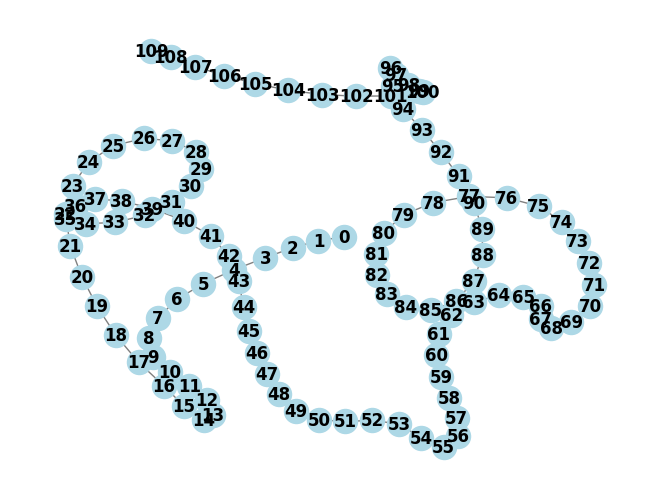

In [27]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def generate_random_simplicial_complex(num_vertices):
    G = nx.Graph()

    # Create vertices
    vertices = list(range(num_vertices))
    G.add_nodes_from(vertices)

    # Connect random edges
    for i in range(num_vertices - 1):
        G.add_edge(i, i + 1)

    return G

# Generate a random simplicial complex with a variable number of vertices
num_vertices = np.random.randint(100, 501)  # Random number of vertices between 100 and 500
simplicial_complex = generate_random_simplicial_complex(num_vertices)

# Visualize the simplicial complex
pos = nx.spring_layout(simplicial_complex)
nx.draw(simplicial_complex, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_weight='bold')
plt.show()

In [28]:
def count_subcomplexes(simplicial_complex, subcomplex_size):
    count = 0
    nodes = list(simplicial_complex.nodes())

    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            subgraph = simplicial_complex.subgraph([nodes[i], nodes[j]])
            if len(subgraph.nodes()) == subcomplex_size:
                count += 1

    return count

def run_experiment(max_size, num_trials):
    results = []
    for size in range(2, max_size + 1):
        counts = []
        for _ in range(num_trials):
            simplicial_complex = generate_random_simplicial_complex(size)
            count = count_subcomplexes(simplicial_complex, 2)
            counts.append(count)
        mean = np.mean(counts)
        std_dev = np.std(counts)
        results.append((size, mean, std_dev))
    return results

max_size = 10  # Максимальное количество вершин
num_trials = 1000  # Количество повторений эксперимента

results = run_experiment(max_size, num_trials)

# Вывод результатов
print("Size\tMean\tStd Dev")
for size, mean, std_dev in results:
    print(f"{size}\t{mean}\t{std_dev}")

Size	Mean	Std Dev
2	1.0	0.0
3	3.0	0.0
4	6.0	0.0
5	10.0	0.0
6	15.0	0.0
7	21.0	0.0
8	28.0	0.0
9	36.0	0.0
10	45.0	0.0


# 2-dimentional simplices

In [29]:
import networkx as nx
import random
import numpy as np

def generate_random_simplicial_complex(size):
    G = nx.Graph()
    # Создаем вершины
    vertices = list(range(size))
    G.add_nodes_from(vertices)

    # Создаем случайные ребра
    for i in range(size):
        for j in range(i + 1, size):
            if np.random.random() < 0.5: # Вероятность наличия ребра
                G.add_edge(i, j)
    

    # Удаляем изолированные вершины
    isolated_nodes = [node for node, degree in dict(G.degree()).items() if degree == 0]
    G.remove_nodes_from(isolated_nodes)
    
    # Удаляем изолированные компоненты связности
    isolated_components = list(nx.isolates(G))
    G.remove_nodes_from(isolated_components)

    return G

# Пример использования
size = 100 # Размер симплициального комплекса
simplicial_complex = generate_random_simplicial_complex(size)

# Вывод информации о симплициальном комплексе
print("Вершины:", simplicial_complex.nodes())
print("Ребра:", simplicial_complex.edges())


Вершины: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Ребра: [(0, 3), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 20), (0, 21), (0, 22), (0, 24), (0, 25), (0, 29), (0, 32), (0, 34), (0, 36), (0, 37), (0, 38), (0, 39), (0, 41), (0, 43), (0, 46), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 61), (0, 62), (0, 64), (0, 65), (0, 66), (0, 67), (0, 71), (0, 74), (0, 75), (0, 76), (0, 78), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 94), (0, 95), (0, 96), (0, 97), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), 

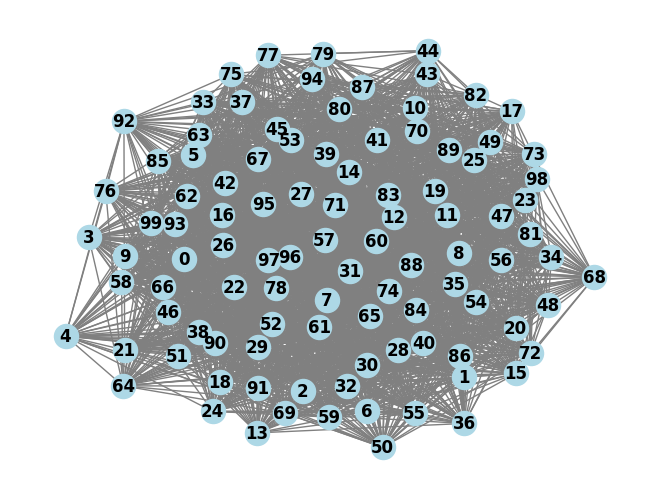

In [30]:
import matplotlib.pyplot as plt

def draw_simplicial_complex(simplicial_complex):
    pos = nx.spring_layout(simplicial_complex)
    nx.draw(simplicial_complex, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_weight='bold')
    plt.show()

draw_simplicial_complex(simplicial_complex)


In [31]:
def count_subcomplexes(simplicial_complex, subcomplex_size):
    count = 0
    nodes = list(simplicial_complex.nodes())

    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            subgraph = simplicial_complex.subgraph([nodes[i], nodes[j]])
            if len(subgraph.nodes()) == subcomplex_size:
                count += 1

    return count

def run_experiment(max_size, num_trials):
    results = []
    for size in range(2, max_size+1):
        counts = []
        for _ in range(num_trials):
            simplicial_complex = generate_random_simplicial_complex(size)
            count = count_subcomplexes(simplicial_complex, 2)
            counts.append(count)
        mean = np.mean(counts)
        std_dev = np.std(counts)
        results.append((size, mean, std_dev))
    return results

max_size = 10  # Максимальное количество вершин
num_trials = 1000  # Количество повторений эксперимента

results = run_experiment(max_size, num_trials)

# Вывод результатов
print("Size\tMean\tStd Dev")
for size, mean, std_dev in results:
    print(f"{size}\t{mean}\t{std_dev}")

Size	Mean	Std Dev
2	0.49	0.4998999899979995
3	1.899	1.1527354423283775
4	4.76	1.8100828710310475
5	8.814	2.1774765211133733
6	14.094	2.1538718624839315
7	20.31	2.072172772719495
8	27.611	1.6750161193254234
9	35.752	1.3865410199485626
10	44.838	1.1965600695326586


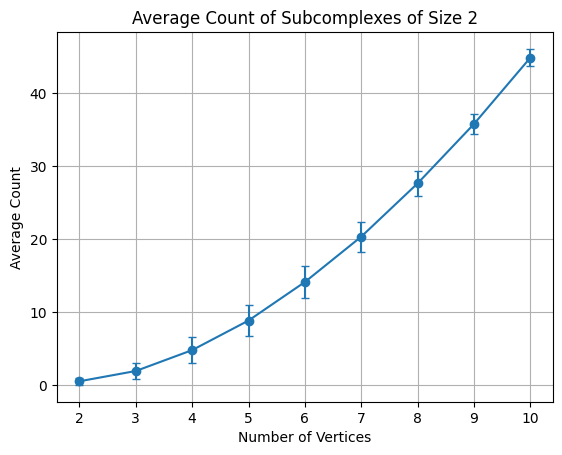

In [32]:
import matplotlib.pyplot as plt

def plot_results(results):
    sizes = [result[0] for result in results]
    means = [result[1] for result in results]
    std_devs = [result[2] for result in results]

    plt.errorbar(sizes, means, yerr=std_devs, fmt='o-', capsize=3)
    plt.xlabel('Number of Vertices')
    plt.ylabel('Average Count')
    plt.title('Average Count of Subcomplexes of Size 2')
    plt.grid(True)
    plt.show()


plot_results(results)

# Acyclic 2-dimentional simplices


In [33]:
import networkx as nx
import random

def generate_random_acyclic_simplicial_complex(size):
    G = nx.Graph()

    # Создаем вершины
    vertices = list(range(size))
    G.add_nodes_from(vertices)

    # Добавляем случайные ребра
    for i in range(size):
        for j in range(i + 1, size):
            if random.random() < 0.5:  # Вероятность наличия ребра
                G.add_edge(i, j)

    # Удаляем ребра для создания ациклического графа
    cycles = list(nx.cycle_basis(G))
    while len(cycles) > 0:
        cycle = random.choice(cycles)
        if len(cycle) >= 2:
            u, v = random.sample(cycle, 2)  # Выбираем две разные вершины из цикла
            if G.has_edge(u, v):  # Проверяем наличие ребра перед его удалением
                G.remove_edge(u, v)
        cycles = list(nx.cycle_basis(G))

    return G

# Пример использования
size = 100  # Размер симплициального комплекса
simplicial_complex = generate_random_acyclic_simplicial_complex(size)

# Вывод информации о симплициальном комплексе
print("Вершины:", simplicial_complex.nodes())
print("Ребра:", simplicial_complex.edges())

Вершины: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Ребра: [(0, 7), (0, 15), (1, 3), (1, 36), (1, 38), (1, 58), (1, 89), (2, 70), (3, 34), (3, 39), (3, 86), (3, 95), (4, 5), (4, 45), (5, 7), (5, 37), (6, 25), (6, 38), (6, 53), (6, 87), (7, 97), (8, 76), (8, 85), (9, 12), (9, 28), (9, 55), (9, 65), (9, 75), (10, 11), (10, 22), (10, 30), (10, 44), (10, 49), (10, 51), (10, 59), (10, 77), (11, 76), (12, 36), (12, 43), (12, 44), (13, 22), (13, 47), (13, 61), (13, 62), (13, 84), (13, 91), (14, 36), (16, 19), (16, 79), (17, 20), (17, 23), (17, 29), (17, 34), (17, 57), (18, 45), (19, 21), (19, 32), (19, 66), (19, 81), (20, 24), (22, 32), (23, 73), (24,

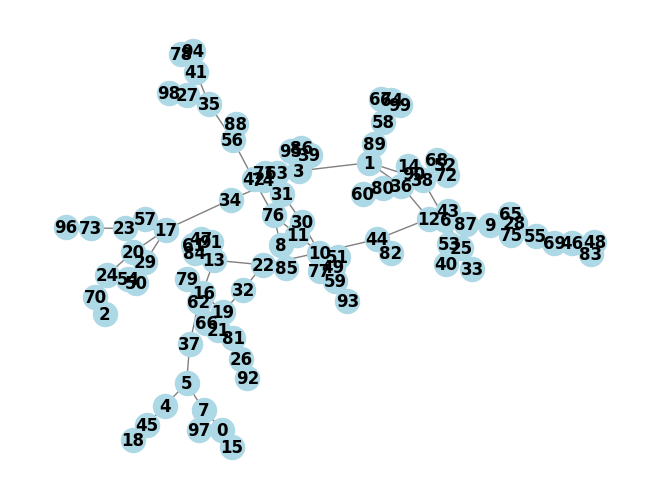

In [34]:
def draw_simplicial_complex(simplicial_complex):
    pos = nx.spring_layout(simplicial_complex)
    nx.draw(simplicial_complex, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_weight='bold')
    plt.show()

draw_simplicial_complex(simplicial_complex)

In [35]:
def count_subcomplexes(simplicial_complex, subcomplex_size):
    count = 0
    nodes = list(simplicial_complex.nodes())

    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            subgraph = simplicial_complex.subgraph([nodes[i], nodes[j]])
            if len(subgraph.nodes()) == subcomplex_size and not nx.has_path(subgraph, nodes[j], nodes[i]):
                count += 1

    return count


def run_experiment(max_size, num_trials):
    results = []
    for size in range(2, max_size + 1):
        counts = []
        for _ in range(num_trials):
            simplicial_complex = generate_random_acyclic_simplicial_complex(size)
            count = count_subcomplexes(simplicial_complex, 2)
            counts.append(count)
        mean = np.mean(counts)
        std_dev = np.std(counts)
        results.append((size, mean, std_dev))
    return results


max_size = 10  # Максимальное количество вершин
num_trials = 1000  # Количество повторений эксперимента

results = run_experiment(max_size, num_trials)

# Вывод результатов
print("Size\tMean\tStd Dev")
for size, mean, std_dev in results:
    print(f"{size}\t{mean}\t{std_dev}")


Size	Mean	Std Dev
2	0.506	0.4999639987039066
3	1.629	0.7066533803782447
4	3.528	0.7260964123310346
5	6.39	0.6556675987114203
6	10.226	0.5068767108479142
7	15.134	0.3768872510446592
8	21.068	0.2633932421304693
9	28.03	0.17635192088548401
10	36.016	0.12547509713086497


# 3-dimentional simplices

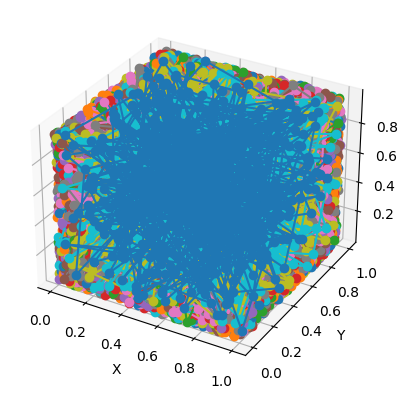

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_3d_simplices(num_vertices):
    simplices = []
    for n in range(100, num_vertices + 1):
        vertices = np.random.rand(n, 3)
        simplices.append(vertices)
    return simplices

num_vertices = 500
simplices = generate_3d_simplices(num_vertices)

# Визуализация сгенерированных симплексов
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for simplex in simplices:
    ax.plot(simplex[:, 0], simplex[:, 1], simplex[:, 2], 'o-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [37]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def count_subcomplexes(simplicial_complex, subcomplex_size):
    count = 0
    nodes = list(simplicial_complex.nodes())

    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            subgraph = simplicial_complex.subgraph([nodes[i], nodes[j]])
            if len(subgraph.nodes()) == subcomplex_size and not nx.has_path(subgraph, nodes[j], nodes[i]):
                count += 1

    return count

def run_experiment(max_size, num_trials):
    results = []
    for size in range(2, max_size + 1):
        counts = []
        for _ in range(num_trials):
            simplicial_complex = generate_random_acyclic_simplicial_complex(size)
            count = count_subcomplexes(simplicial_complex, 2)
            counts.append(count)
        mean = np.mean(counts)
        std_dev = np.std(counts)
        results.append((size, mean, std_dev))
    return results

max_size = 10  # Максимальное количество вершин
num_trials = 1000  # Количество повторений эксперимента

results = run_experiment(max_size, num_trials)

# Вывод результатов
print("Size\tMean\tStd Dev")
for size, mean, std_dev in results:
    print(f"{size}\t{mean}\t{std_dev}")


Size	Mean	Std Dev
2	0.518	0.4996758949559204
3	1.63	0.7007852738178793
4	3.566	0.7480935770343173
5	6.342	0.6124018288672887
6	10.224	0.523281950768417
7	15.122	0.3783067538387334
8	21.065	0.25054939632735096
9	28.035	0.19435791725576812
10	36.025	0.16844880527923012


# Acyclic 3-dimentional simplices

In [38]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_random_3d_acyclic_simplicial_complex(size):
    simplicial_complex = nx.Graph()
    vertices = np.random.rand(size, 3)

    # Добавление вершин в симплициальный комплекс
    for i in range(size):
        simplicial_complex.add_node(i, pos=vertices[i])

    # Добавление трехмерных симплексов в симплициальный комплекс
    for i in range(size):
        for j in range(i + 1, size):
            for k in range(j + 1, size):
                # Проверка наличия реберной цепи между вершинами
                if not nx.has_path(simplicial_complex, i, k) and not nx.has_path(simplicial_complex, k, i):
                    simplicial_complex.add_edge(i, j)
                    simplicial_complex.add_edge(i, k)
                    simplicial_complex.add_edge(j, k)

    return simplicial_complex

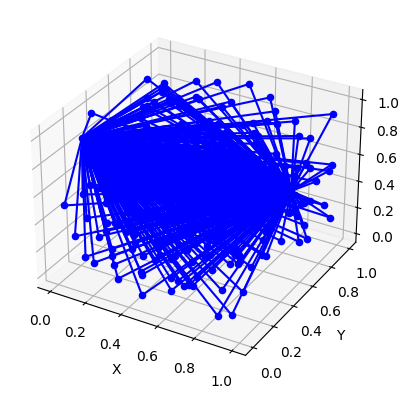

In [39]:
# Генерация симплициального комплекса
size = 300
simplicial_complex = generate_random_3d_acyclic_simplicial_complex(size)

# Визуализация симплициального комплекса
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for node in simplicial_complex.nodes():
    pos = simplicial_complex.nodes[node]['pos']
    ax.scatter(pos[0], pos[1], pos[2], color='b')

for edge in simplicial_complex.edges():
    v1 = simplicial_complex.nodes[edge[0]]['pos']
    v2 = simplicial_complex.nodes[edge[1]]['pos']
    ax.plot([v1[0], v2[0]], [v1[1], v2[1]], [v1[2], v2[2]], 'b-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [41]:
def count_subcomplexes(simplicial_complex, subcomplex_size):
    count = 0
    nodes = list(simplicial_complex.nodes())

    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            subgraph = simplicial_complex.subgraph([nodes[i], nodes[j]])
            if len(subgraph.nodes()) == subcomplex_size and not nx.has_path(subgraph, nodes[j], nodes[i]):
                count += 1

    return count


def run_experiment(max_size, num_trials):
    results = []
    for size in range(2, max_size + 1):
        counts = []
        for _ in range(num_trials):
            simplicial_complex = generate_random_acyclic_simplicial_complex(size)
            count = count_subcomplexes(simplicial_complex, 2)
            counts.append(count)
        mean = np.mean(counts)
        std_dev = np.std(counts)
        results.append((size, mean, std_dev))
    return results


max_size = 10  # Максимальное количество вершин
num_trials = 1000  # Количество повторений эксперимента

results = run_experiment(max_size, num_trials)

# Вывод результатов
print("Size\tMean\tStd Dev")
for size, mean, std_dev in results:
    print(f"{size}\t{mean}\t{std_dev}")

Size	Mean	Std Dev
2	0.506	0.4999639987039066
3	1.669	0.7067099829491587
4	3.509	0.6970789051463256
5	6.41	0.6869497798238238
6	10.226	0.5068767108479142
7	15.131	0.3844983745089178
8	21.084	0.3015692291995322
9	28.039	0.19359493795035035
10	36.019	0.14366279963859815


# Multi-dimentional simplices

In [55]:
import numpy as np

def generate_random_simplicial_complex(n, dim):
    simplicial_complex = []
    vertices = np.random.rand(n, dim)

    for i in range(n):
        simplex = [vertices[i]]
        for j in range(dim):
            point = vertices[i].copy()
            point[j] += 1.0
            simplex.append(point)
        simplicial_complex.append(simplex)

    return simplicial_complex

n = 70  # Количество вершин
dim = 123  # Размерность пространства

simplicial_complex = generate_random_simplicial_complex(n, dim)
print(simplicial_complex)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



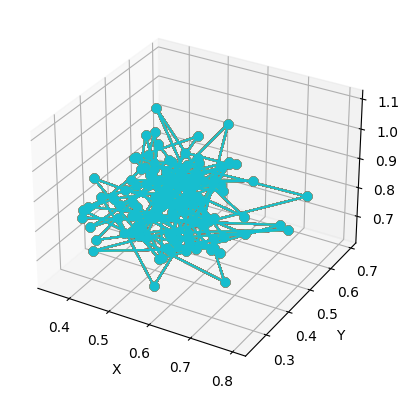

In [56]:
from sklearn.decomposition import PCA

# Применение PCA для сокращения размерности до трех измерений
pca = PCA(n_components=3)
points = np.concatenate(simplicial_complex)
reduced_points = pca.fit_transform(points)

# Визуализация трехмерного симплекса
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for simplex in simplicial_complex:
    vertices = reduced_points[:len(simplex)]
    ax.plot(vertices[:, 0], vertices[:, 1], vertices[:, 2], 'o-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [57]:
def count_subcomplexes(simplicial_complex, subcomplex_size):
    count = 0
    nodes = list(simplicial_complex.nodes())

    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            subgraph = simplicial_complex.subgraph([nodes[i], nodes[j]])
            if len(subgraph.nodes()) == subcomplex_size and not nx.has_path(subgraph, nodes[j], nodes[i]):
                count += 1

    return count


def run_experiment(max_size, num_trials):
    results = []
    for size in range(2, max_size + 1):
        counts = []
        for _ in range(num_trials):
            simplicial_complex = generate_random_acyclic_simplicial_complex(size)
            count = count_subcomplexes(simplicial_complex, 2)
            counts.append(count)
        mean = np.mean(counts)
        std_dev = np.std(counts)
        results.append((size, mean, std_dev))
    return results


max_size = 10  # Максимальное количество вершин
num_trials = 1000  # Количество повторений эксперимента

results = run_experiment(max_size, num_trials)

# Вывод результатов
print("Size\tMean\tStd Dev")
for size, mean, std_dev in results:
    print(f"{size}\t{mean}\t{std_dev}")

Size	Mean	Std Dev
2	0.495	0.49997499937496875
3	1.624	0.686020407859708
4	3.532	0.70920800897903
5	6.37	0.6442825467137846
6	10.217	0.5176011978347809
7	15.111	0.3669863757689105
8	21.075	0.2745450782658469
9	28.046	0.23212927432790548
10	36.019	0.14366279963859815
